# Import Libraries

In [482]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

# Upload dataframe 

In [483]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [484]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [485]:
titanic.shape

(891, 15)

# Handling Duplicates Data

In [486]:
#looking for duplicate data
titanic = titanic.drop_duplicates()
titanic.shape

(784, 15)

In [487]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
885,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


In [488]:
titanic.reset_index(drop=True, inplace=True)

In [489]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
779,0,3,female,39.0,0,5,29.125,Q,Third,woman,False,NaN,Queenstown,no,False
780,1,1,female,19.0,0,0,30.000,S,First,woman,False,B,Southampton,yes,True
781,0,3,female,NaN,1,2,23.450,S,Third,woman,False,NaN,Southampton,no,False
782,1,1,male,26.0,0,0,30.000,C,First,man,True,C,Cherbourg,yes,True
783,0,3,male,32.0,0,0,7.750,Q,Third,man,True,NaN,Queenstown,no,True


# Handling missing data

In [490]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

## Drop missings data

In [491]:
titanic_without_na = titanic.dropna(axis=1)

In [492]:
titanic_without_na.head()

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True


In [493]:
titanic_without_na.shape

(784, 11)

In [494]:
titanic_without_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    784 non-null    int64   
 1   pclass      784 non-null    int64   
 2   sex         784 non-null    object  
 3   sibsp       784 non-null    int64   
 4   parch       784 non-null    int64   
 5   fare        784 non-null    float64 
 6   class       784 non-null    category
 7   who         784 non-null    object  
 8   adult_male  784 non-null    bool    
 9   alive       784 non-null    object  
 10  alone       784 non-null    bool    
dtypes: bool(2), category(1), float64(1), int64(4), object(3)
memory usage: 51.6+ KB


# Tranforming categorizing data to dummie data

## checking variables

### Survived and Alive variables

In [495]:
titanic_without_na.survived.value_counts()

0    461
1    323
Name: survived, dtype: int64

In [496]:
titanic_without_na.alive.value_counts()

no     461
yes    323
Name: alive, dtype: int64

In [497]:
titanic_without_na[['alive', 'survived', 'sibsp']].groupby(['alive', 'survived']).count()

,,sibsp
alive,survived,
no,0,461
yes,1,323


Conclusion: 'Survived' and 'alive' had the same informations, then we'll drop 'alive'

In [498]:
titanic_without_na = titanic_without_na.drop('alive', axis=1)

### pclass and class variables

In [499]:
titanic_without_na['pclass'].unique()

array([3, 1, 2], dtype=int64)

In [500]:
titanic_without_na['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [501]:
titanic_without_na[['pclass', 'class', 'sibsp']].groupby(['pclass', 'class']).count()

sibsp
pclass class        
1      First     214
       Second      0
       Third       0
2      First       0
       Second    165
       Third       0
3      First       0
       Second      0
       Third     405

Conclusion: 'pclass' and 'class' had the same informations, then we'll drop 'pclass'

### Others variables

In [502]:
titanic_without_na['sex'].unique()

array(['male', 'female'], dtype=object)

In [503]:
titanic_without_na['sibsp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [504]:
titanic_without_na['parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [505]:
titanic_without_na['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [506]:
titanic_without_na[['sex', 'who', 'sibsp']].groupby(['sex', 'who']).count()

sibsp
sex    who         
female child     42
       woman    251
male   child     40
       man      451

In [507]:
titanic_without_na.head(2)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alone
0,0,3,male,1,0,7.2500,Third,man,True,False
1,1,1,female,1,0,71.2833,First,woman,False,False


## Tranforming on Dummies variables (flag)

### Class and who variables

In [508]:
titanic_encoded = pd.get_dummies(titanic_without_na, columns=['class', 'who'], drop_first=True)

In [509]:
titanic_encoded.head(5)

,survived,pclass,sex,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,0,3,male,1,0,7.2500,True,False,0,1,1,0
1,1,1,female,1,0,71.2833,False,False,0,0,0,1
2,1,3,female,0,0,7.9250,False,True,0,1,0,1
3,1,1,female,1,0,53.1000,False,False,0,0,0,1
4,0,3,male,0,0,8.0500,True,True,0,1,1,0


### sex variable

#### Mapping

In [510]:
titanic_encoded.sex.unique()

array(['male', 'female'], dtype=object)

In [511]:
titanic_encoded.sex = titanic_encoded.sex.map({'female':1, 'male':0})

In [512]:
titanic_encoded.sex.unique()

array([0, 1], dtype=int64)

### adult male and alone variables

In [513]:
titanic_encoded.adult_male.astype(int)

0      1
1      0
2      0
3      0
4      1
      ..
779    0
780    0
781    0
782    1
783    1
Name: adult_male, Length: 784, dtype: int32

In [514]:
titanic_encoded.adult_male = titanic_encoded.adult_male.astype(int)
titanic_encoded.alone = titanic_encoded.alone.astype(int)

## Checking variables changed

In [515]:
titanic_encoded.dtypes

survived          int64
pclass            int64
sex               int64
sibsp             int64
parch             int64
fare            float64
adult_male        int32
alone             int32
class_Second      uint8
class_Third       uint8
who_man           uint8
who_woman         uint8
dtype: object

In [516]:
titanic_encoded.columns

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'adult_male',
       'alone', 'class_Second', 'class_Third', 'who_man', 'who_woman'],
      dtype='object')

# Split explanatory variables of target variables

In [517]:
y = titanic_encoded.survived

In [518]:
y

0      0
1      1
2      1
3      1
4      0
      ..
779    0
780    1
781    0
782    1
783    0
Name: survived, Length: 784, dtype: int64

In [519]:
x = titanic_encoded.drop('survived', axis = 1)

In [520]:
x

,pclass,sex,sibsp,parch,fare,adult_male,alone,class_Second,class_Third,who_man,who_woman
0,3,0,1,0,7.2500,1,0,0,1,1,0
1,1,1,1,0,71.2833,0,0,0,0,0,1
2,3,1,0,0,7.9250,0,1,0,1,0,1
3,1,1,1,0,53.1000,0,0,0,0,0,1
4,3,0,0,0,8.0500,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
779,3,1,0,5,29.1250,0,0,0,1,0,1
780,1,1,0,0,30.0000,0,1,0,0,0,1
781,3,1,1,2,23.4500,0,0,0,1,0,1
782,1,0,0,0,30.0000,1,1,0,0,1,0


# Classification tree by flag variables

In [521]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

## Adult male

In [522]:
clf = clf.fit(x[['adult_male']],y)
clf

DecisionTreeClassifier(random_state=100)

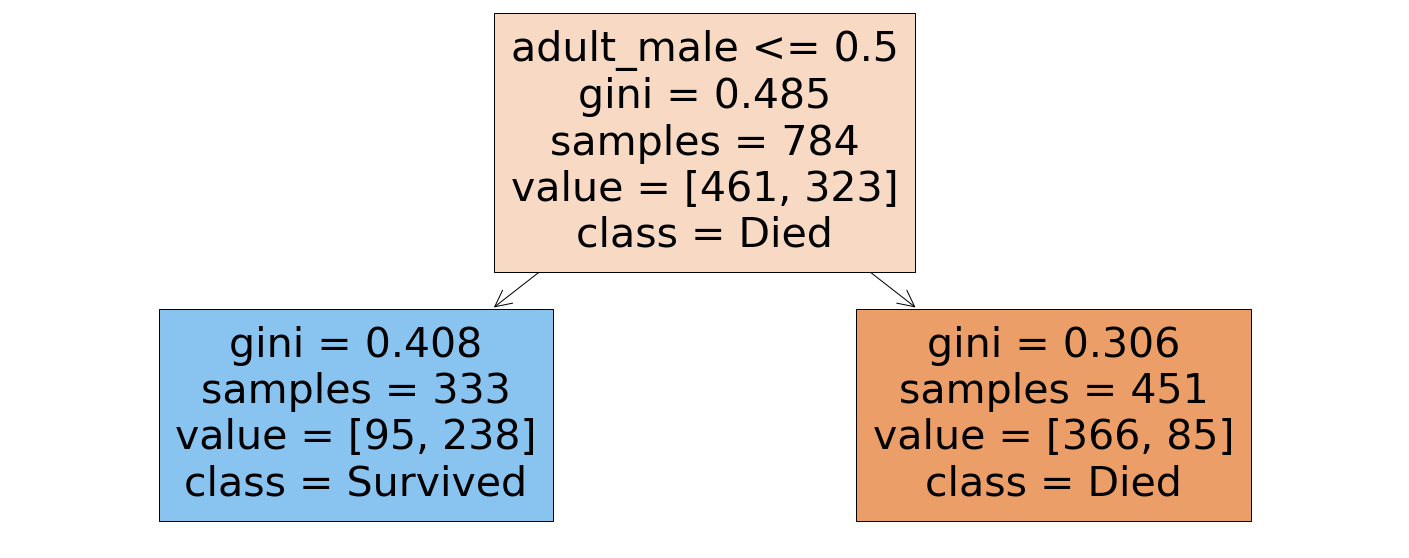

In [523]:
plt.figure(figsize=(25,10))
plot_tree(clf,
         filled=True,
         class_names=['Died', 'Survived'],
         feature_names=['adult_male']);

## 3rd Class

In [524]:
clf = clf.fit(x[['class_Third']],y)
clf

DecisionTreeClassifier(random_state=100)

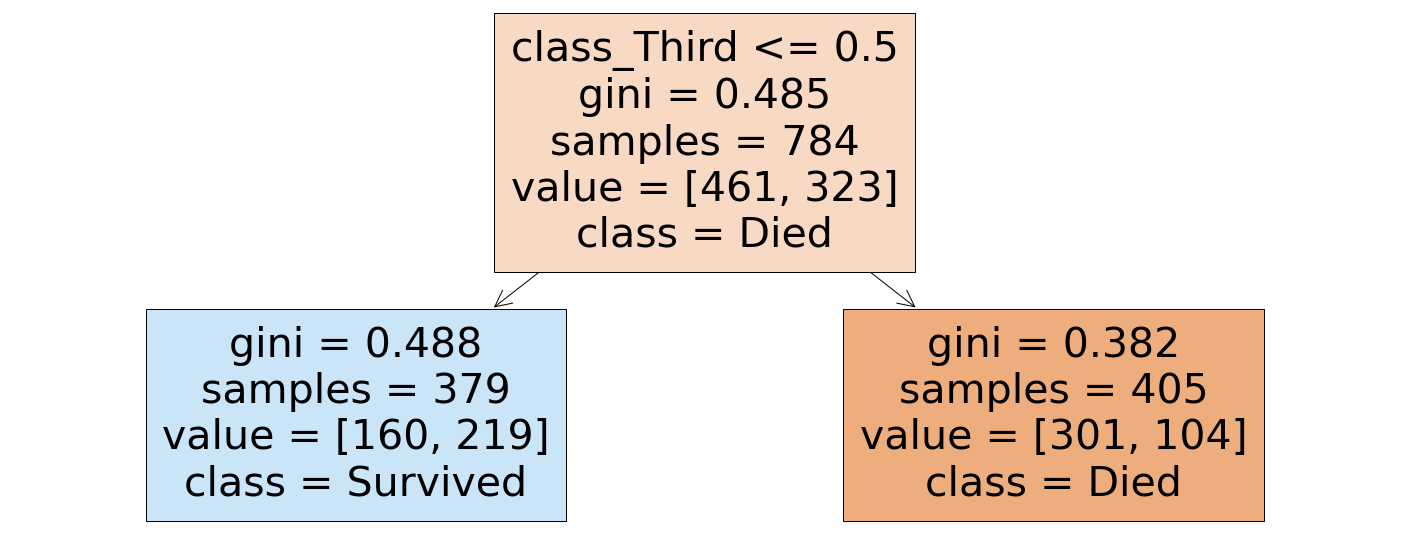

In [525]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
         filled=True,
         class_names=['Died', 'Survived'],
         feature_names=['class_Third']);

# Classification tree for 2 flag variables

## Adult male and 3rd Class

In [526]:
clf = clf.fit(x[['adult_male', 'class_Third']],y)
clf

DecisionTreeClassifier(random_state=100)

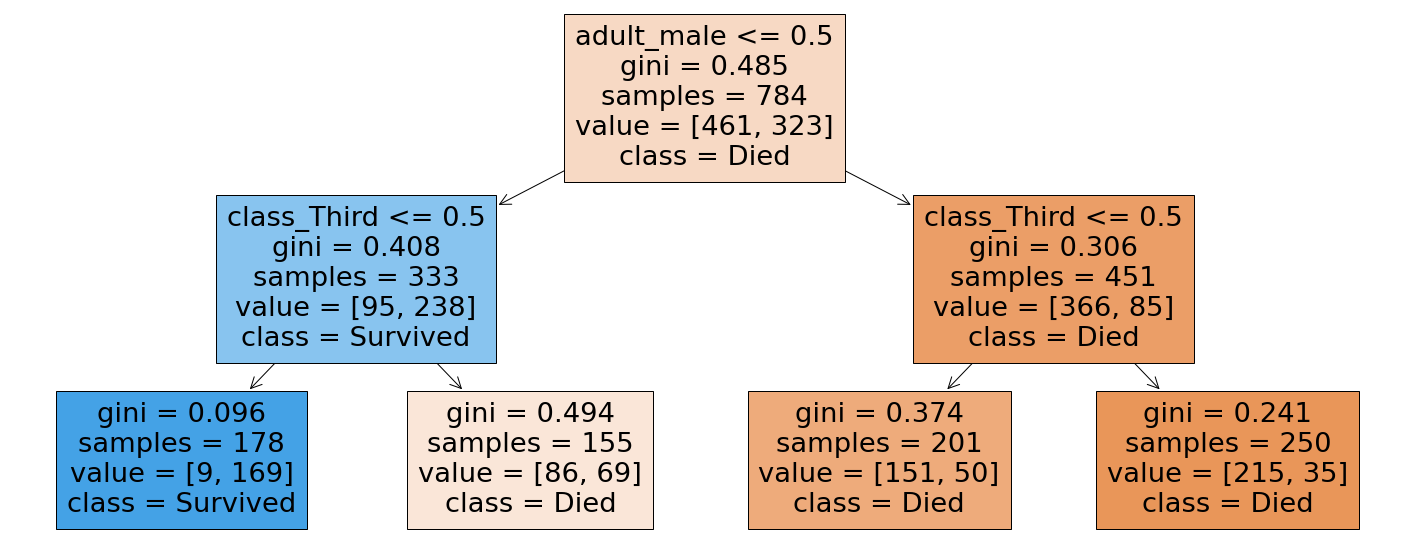

In [527]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
         filled=True,
         class_names=['Died', 'Survived'],
         feature_names=['adult_male', 'class_Third']);

# Classification tree with in all of variables

In [528]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [529]:
clf = clf.fit(x,y)
clf

DecisionTreeClassifier(random_state=100)

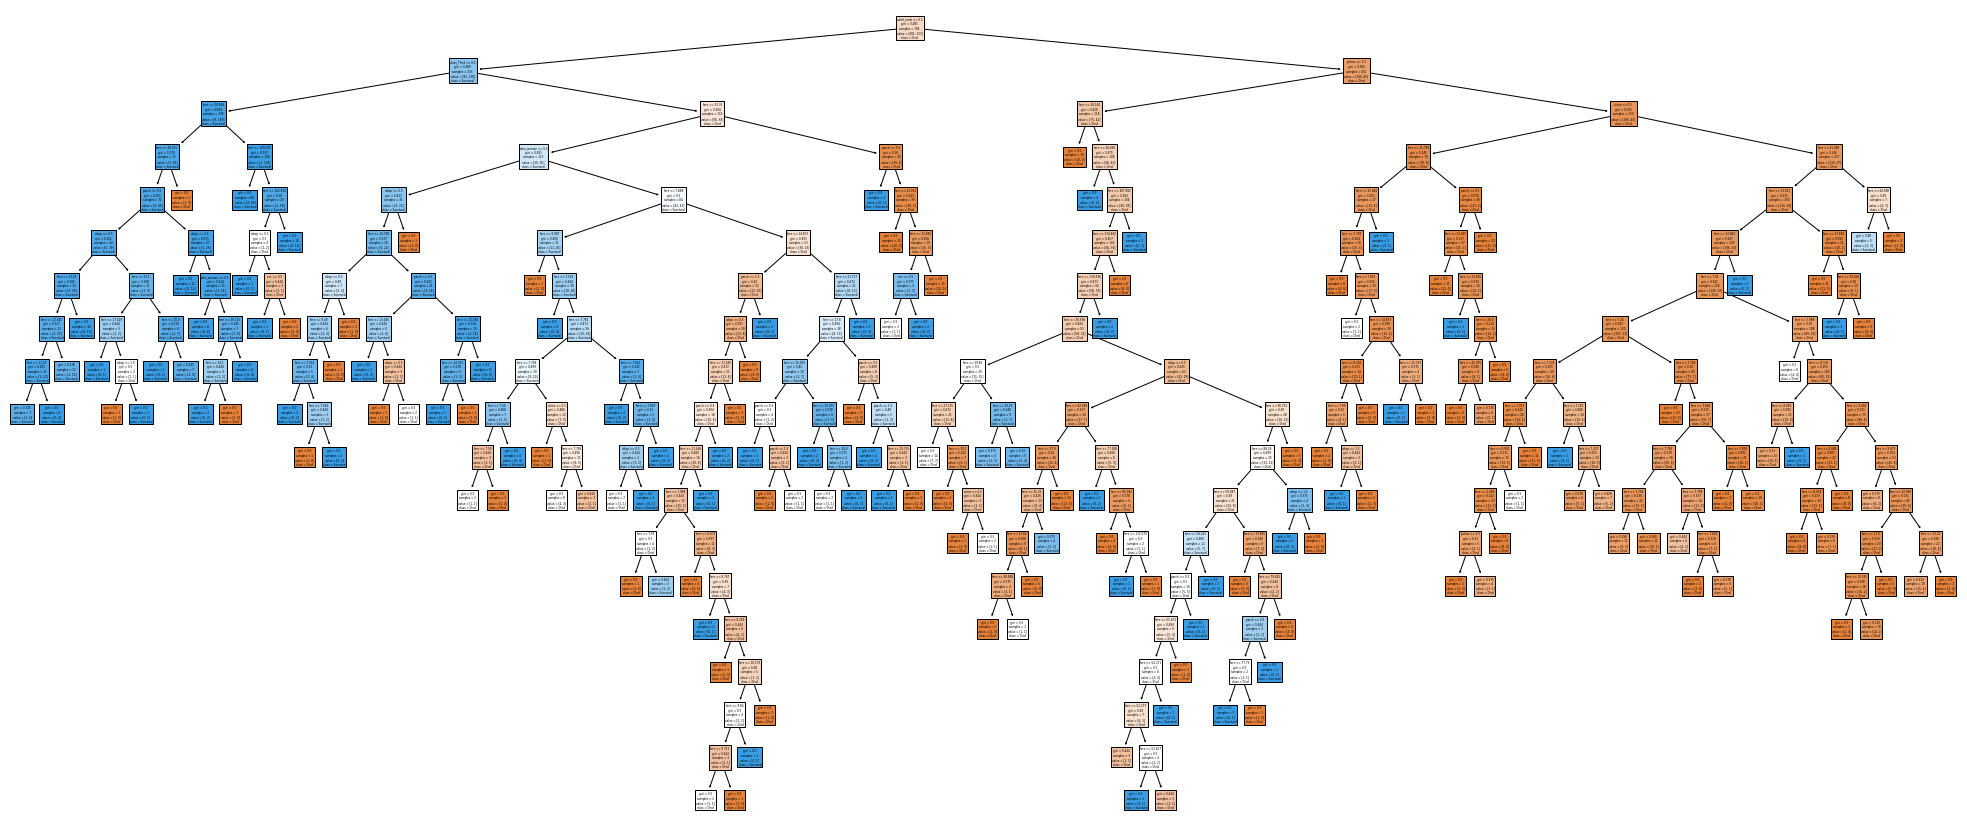

In [530]:
plt.figure(figsize=(35, 15))
plot_tree(clf,
         filled=True,
         class_names=['Died', 'Survived'],
         feature_names=x.columns);

C:\Users\Jonatas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


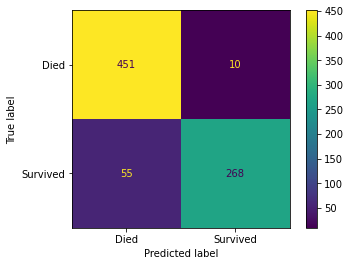

In [531]:
plot_confusion_matrix(clf, x, y, display_labels=['Died', 'Survived']);

In [532]:
predict = clf.predict(x)

In [533]:
accuracy_score(y, predict)

0.9170918367346939

Comment: As we can see, the accuracy of predict datas is: 91,7% - it is a good prediction.

# Spliting datas between training and test

In [534]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [535]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_train,y_train)

In [536]:
y_rat_test = clf.predict(x_test)
y_rat_test

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

C:\Users\Jonatas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


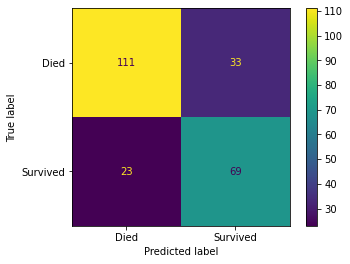

In [537]:
plot_confusion_matrix(clf, x_test, y_test, display_labels=['Died', 'Survived']);

In [538]:
accuracy_score(y_test, y_rat_test)

0.7627118644067796

Comment: We split 70% of data bases for test, and we can see on accuracy equal 76,3%

# Pre Prunning Tree

## Depth

In [539]:
clf = DecisionTreeClassifier(max_depth=2, random_state=100)
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)
accuracy_score(y_test, predict)

0.7923728813559322

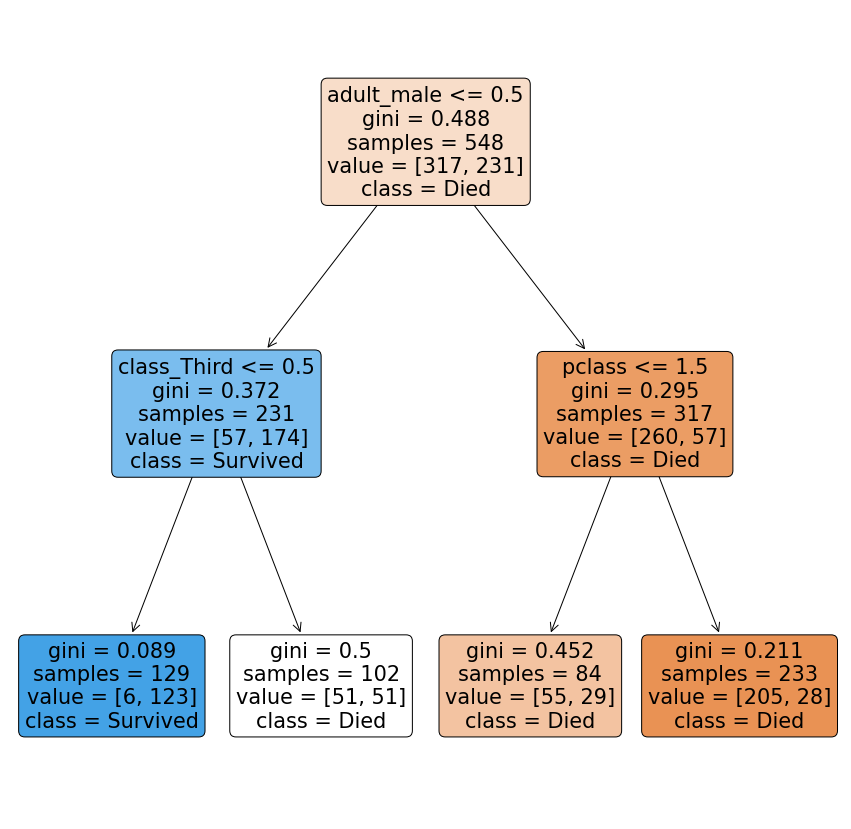

In [540]:
plt.figure(figsize=[15,15])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Died', 'Survived'],
         feature_names=x_train.columns);

## minimal samples on the tree leaf

In [541]:
clf = DecisionTreeClassifier(min_samples_leaf=80, random_state=100)
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)
accuracy_score(y_test, predict)

0.7923728813559322

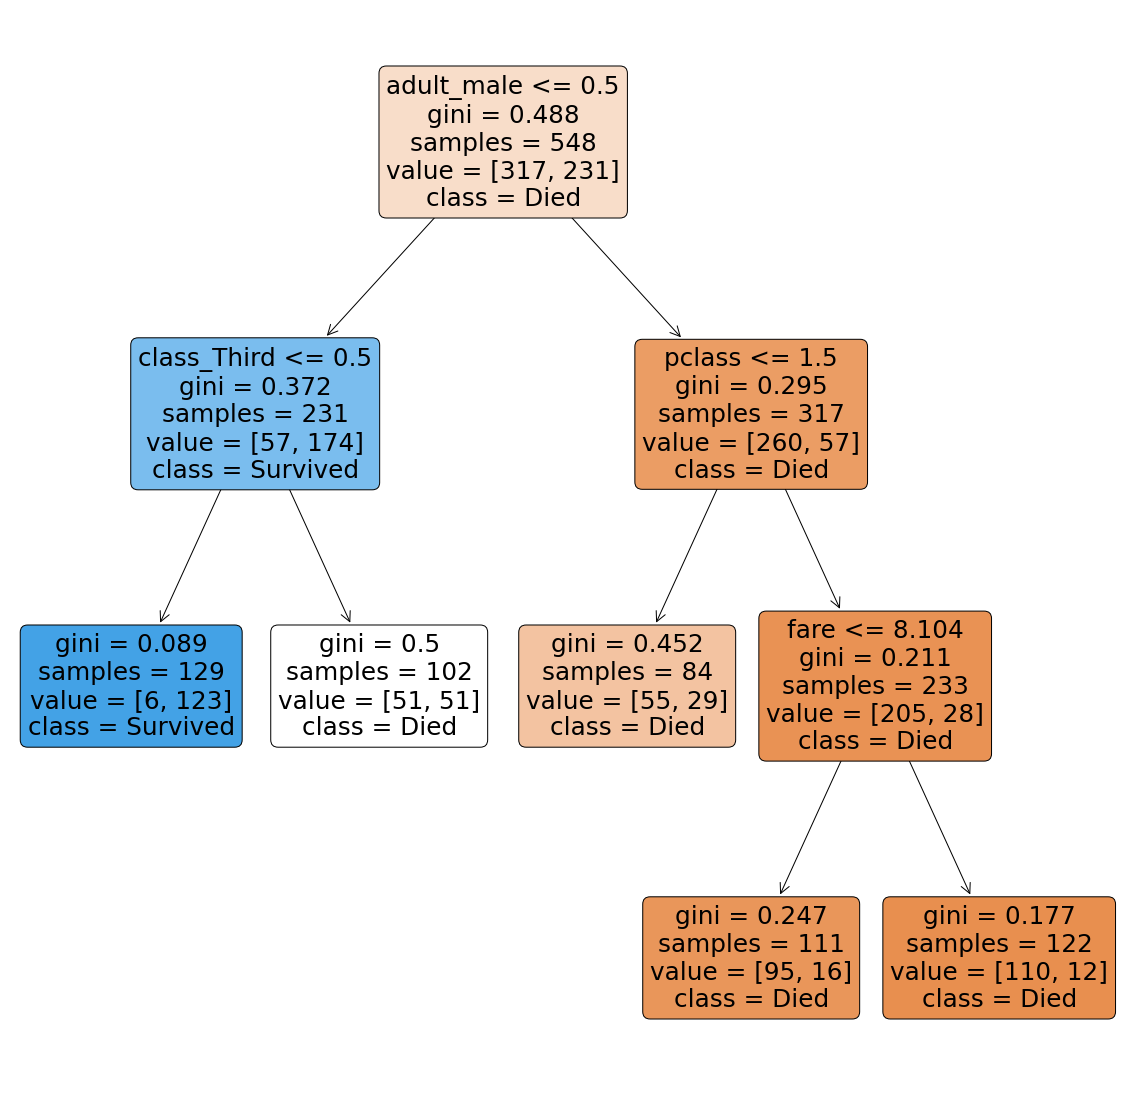

In [542]:
plt.figure(figsize=[20,20])
plot_tree(clf,
        filled=True,
        rounded=True,
        class_names=['Died', 'Survived'],
        feature_names=x_train.columns);

## Combination between Depth and minimal samples by tree leaf

In [554]:
clf = DecisionTreeClassifier(max_depth=8, min_samples_leaf=8, random_state=100)
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)
accuracy_score(y_test, predict)

0.7838983050847458

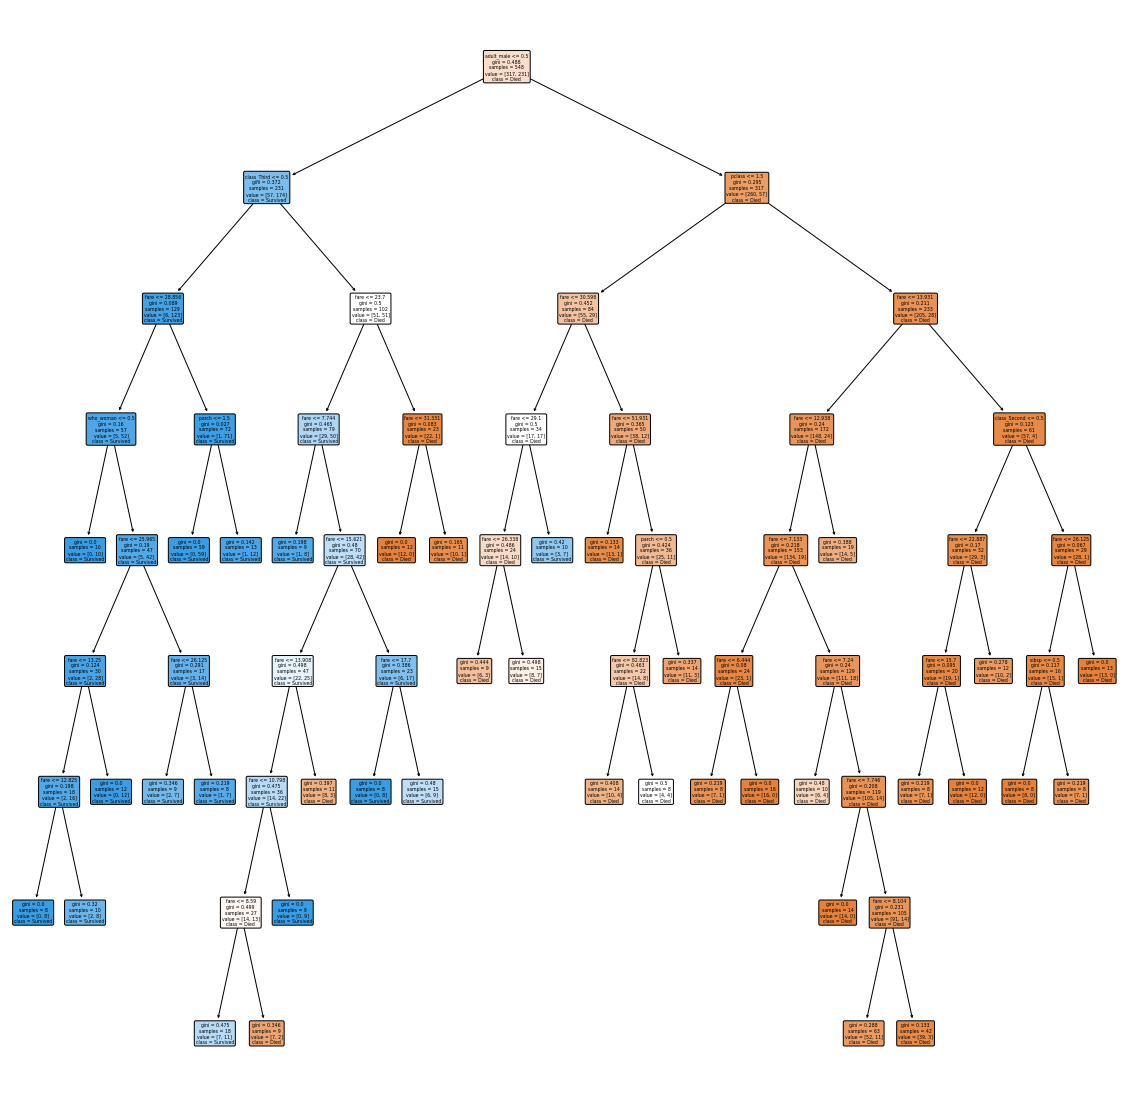

In [557]:
plt.figure(figsize=[20,20])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Died', 'Survived'],
         feature_names=x_train.columns);

# Post Pruning Tree

In [545]:
clf = DecisionTreeClassifier(random_state=100)
path = clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [546]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

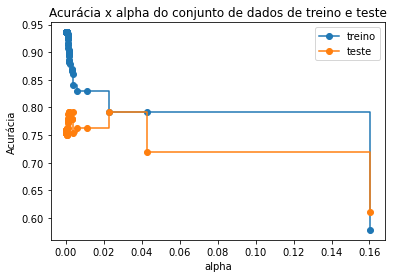

In [547]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia x alpha do conjunto de dados de treino e teste')
ax.plot(ccp_alphas, train_scores, marker='o', label='treino', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='teste', drawstyle = 'steps-post')
ax.legend()
plt.show()

In [548]:
pd.DataFrame({'alpha': ccp_alphas.tolist(), 'score': test_scores})

,alpha,score
0,0.000000,0.758475
1,0.000028,0.758475
2,0.000065,0.758475
3,0.000065,0.758475
4,0.000115,0.758475
5,0.000122,0.754237
6,0.000122,0.754237
7,0.000142,0.754237
8,0.000160,0.754237
9,0.000162,0.754237


In [549]:
clf_pruning = DecisionTreeClassifier(random_state=100, ccp_alpha=0.022588)

C:\Users\Jonatas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


0.7923728813559322

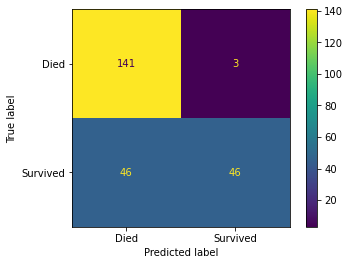

In [550]:
clf_pruning.fit(x_train, y_train)
predict = clf_pruning.predict(x_test)
plot_confusion_matrix(clf_pruning, x_test, y_test, display_labels= ['Died', 'Survived']);
accuracy_score(y_test, predict)

In [551]:
pred = clf_pruning.predict(x_test)

In [552]:
accuracy_score(y_test, pred)

0.7923728813559322

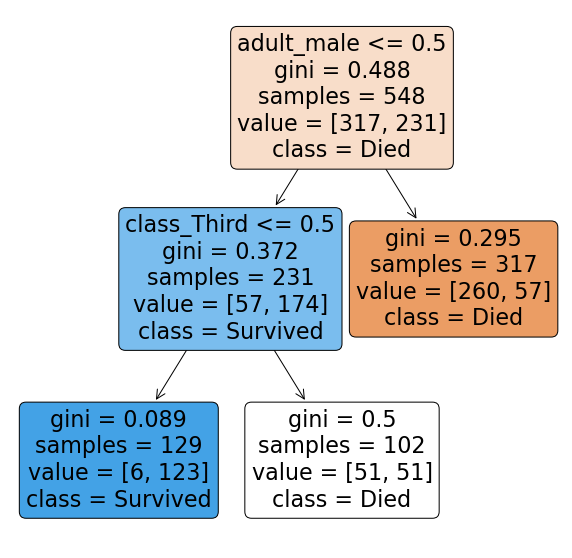

In [553]:
plt.figure(figsize=[10, 10])
plot_tree(clf_pruning,
         filled=True,
         rounded=True,
         class_names=['Died', 'Survived'],
         feature_names=x_train.columns);